# Exploratory Data Analysis
In this section, we:
* loaded data 
* checked for missing data
* assigned an integer for each tool stage
* merged data for tool stages into one large dataframe
* cleaned the large dataframe
* filled missing data
* visualized correlation between columns

In [1]:
# load data
import pandas as pd
import numpy as np
chert_hh_1 = pd.read_excel("/content/EXP-00001-Master.xlsx")
chert_hh_2 = pd.read_excel("/content/EXP-00002-Master.xlsx")
chert_sh = pd.read_excel("/content/EXP-00003-Master.xlsx")
obsidian_cr = pd.read_excel("/content/EXP-00004-Master.xlsx")
obsidian_sh = pd.read_excel("/content/EXP-00005-Master.xlsx")


In [ ]:
# show dataframe summaries
print('Chert HH1 summary ', chert_hh_1.describe())
print('================================')
print('Chert HH2 summary ', chert_hh_2.describe())
print('================================')
print('Chert SH summary ', chert_sh.describe())
print('================================')
print('Obsidian CR summary ', obsidian_cr.describe())
print('================================')
print('Obsidian SH summary ', obsidian_sh.describe())

Chert HH1 summary             Id  Img Id         Da        Dp     FWidth   FLength  FThickness  \
count   48544   48544  48544.000  48544.00  48544.000  48544.00   48544.000   
unique  33980    8336   2526.000   3092.00   2633.000   4088.00    1402.000   
top        71    8939      0.383      0.42      0.347      0.65       0.128   
freq        5      23    163.000    130.00    138.000     70.00     315.000   

          ELength  EThickness     EWidth  ...  Filter6  L/W Ratio  W/L Ratio  \
count   48544.000   48544.000  48544.000  ...    48544  48544.000  48544.000   
unique   4047.000    1383.000   2575.000  ...        2   3149.000    788.000   
top         0.657       0.135      0.347  ...   Reject      1.392      0.628   
freq       74.000     319.000    150.000  ...    48543     77.000    150.000   

        W/T Ratio  T/W Ratio  CHull Surface Area      Sieve  Ellipticity  \
count     48544.0  48544.000           48544.000  48544.000     48544.00   
unique     4752.0    892.000    

In [ ]:
# check for missing data
print('Chert HH1 missing data? ', chert_hh_1.isna().sum())
print('================================')
print('Chert HH2 missing data? \n', chert_hh_2.isna().sum())
print('================================')
print('Chert SH missing data? \n', chert_sh.isna().sum())
print('================================')
print('\nObsidian CR missing data? \n', obsidian_cr.isna().sum())
print('================================')
print('\nObsidian SH missing data? \n', obsidian_sh.isna().sum())

print('No missing data.')

Chert HH1 missing data?  Id                    0
Img Id                0
Da                    0
Dp                    0
FWidth                0
FLength               0
FThickness            0
ELength               0
EThickness            0
EWidth                0
Volume                0
Area                  0
Perimeter             0
CHull  Area           0
CHull Perimeter       0
Sphericity            0
L/T Ratio             0
T/L Aspect Ratio      0
Compactness           0
Roundness             0
Ellipse Ratio         0
Circularity           0
Solidity              0
Concavity             0
Convexity             0
Extent                0
hash                  0
Surface Area          0
Filter0               0
Filter1               0
Filter2               0
Filter3               0
Filter4               0
Filter5               0
Filter6               0
L/W Ratio             0
W/L Ratio             0
W/T Ratio             0
T/W Ratio             0
CHull Surface Area    0
Sieve          

In [2]:
# add target column, stage, to each dataframe
chert_hh_1['Stage'] = 1
chert_hh_2['Stage'] = 2
chert_sh['Stage'] = 3
obsidian_cr['Stage'] = 4
obsidian_sh['Stage'] = 5

# join dataframes
dfs = [chert_hh_1, chert_hh_2, chert_sh, obsidian_cr, obsidian_sh]
tools_df = pd.concat(dfs)

# remove unecessary columns + row 0
tools_df.drop(columns = ['Id','Filter0','Filter1', 'Filter2', 'Filter3', 'Filter4', 'Filter5', 'Filter6', 'hash'], inplace = True)
tools_df.drop(columns = ['Transparency', 'Curvature', 'Angularity', 'Img Id'], inplace = True)
tools_df.drop(0, inplace = True)

# check for missing values again and fill
tools_df.fillna(0, inplace = True)          
print('Missing data filled.')
tools_df.isna().sum()

'''
take the missing measurements out of the files for obsidian so we are measuring the same
things across the board. so completely remove those 3 columns so data is uniform.
transparency is a high differentiator

there may not be a difference between transparency between chert
and obsidian transparency at the microdebitage level. 
discuss this in our paper as a bias.

she will have them rerun the first three samples of chert for the last 3 columns.

what does the "reject" response mean in the filter0-6?
she removed them in the soil model as well. we did too.

apply her model for sorting soil from microdebitage. use that, then
use our model to classify the microdebitage. 
she also has the estimates for the amount of microdebitage.

write up a quick set of notes and send her the deliverables from this
program. 

after the program, she will write up things regarding our model
and add in variables we removed (last 3 columns).
she plans to submit a publication some time in october and will contact us.


'''

Missing data filled.


'\ntake the missing measurements out of the files for obsidian so we are measuring the same\nthings across the board. so completely remove those 3 columns so data is uniform.\ntransparency is a high differentiator\n\nthere may not be a difference between transparency between chert\nand obsidian transparency at the microdebitage level. \ndiscuss this in our paper as a bias.\n\nshe will have them rerun the first three samples of chert for the last 3 columns.\n\nwhat does the "reject" response mean in the filter0-6?\nshe removed them in the soil model as well. we did too.\n\napply her model for sorting soil from microdebitage. use that, then\nuse our model to classify the microdebitage. \nshe also has the estimates for the amount of microdebitage.\n\nwrite up a quick set of notes and send her the deliverables from this\nprogram. \n\nafter the program, she will write up things regarding our model\nand add in variables we removed (last 3 columns).\nshe plans to submit a publication some tim

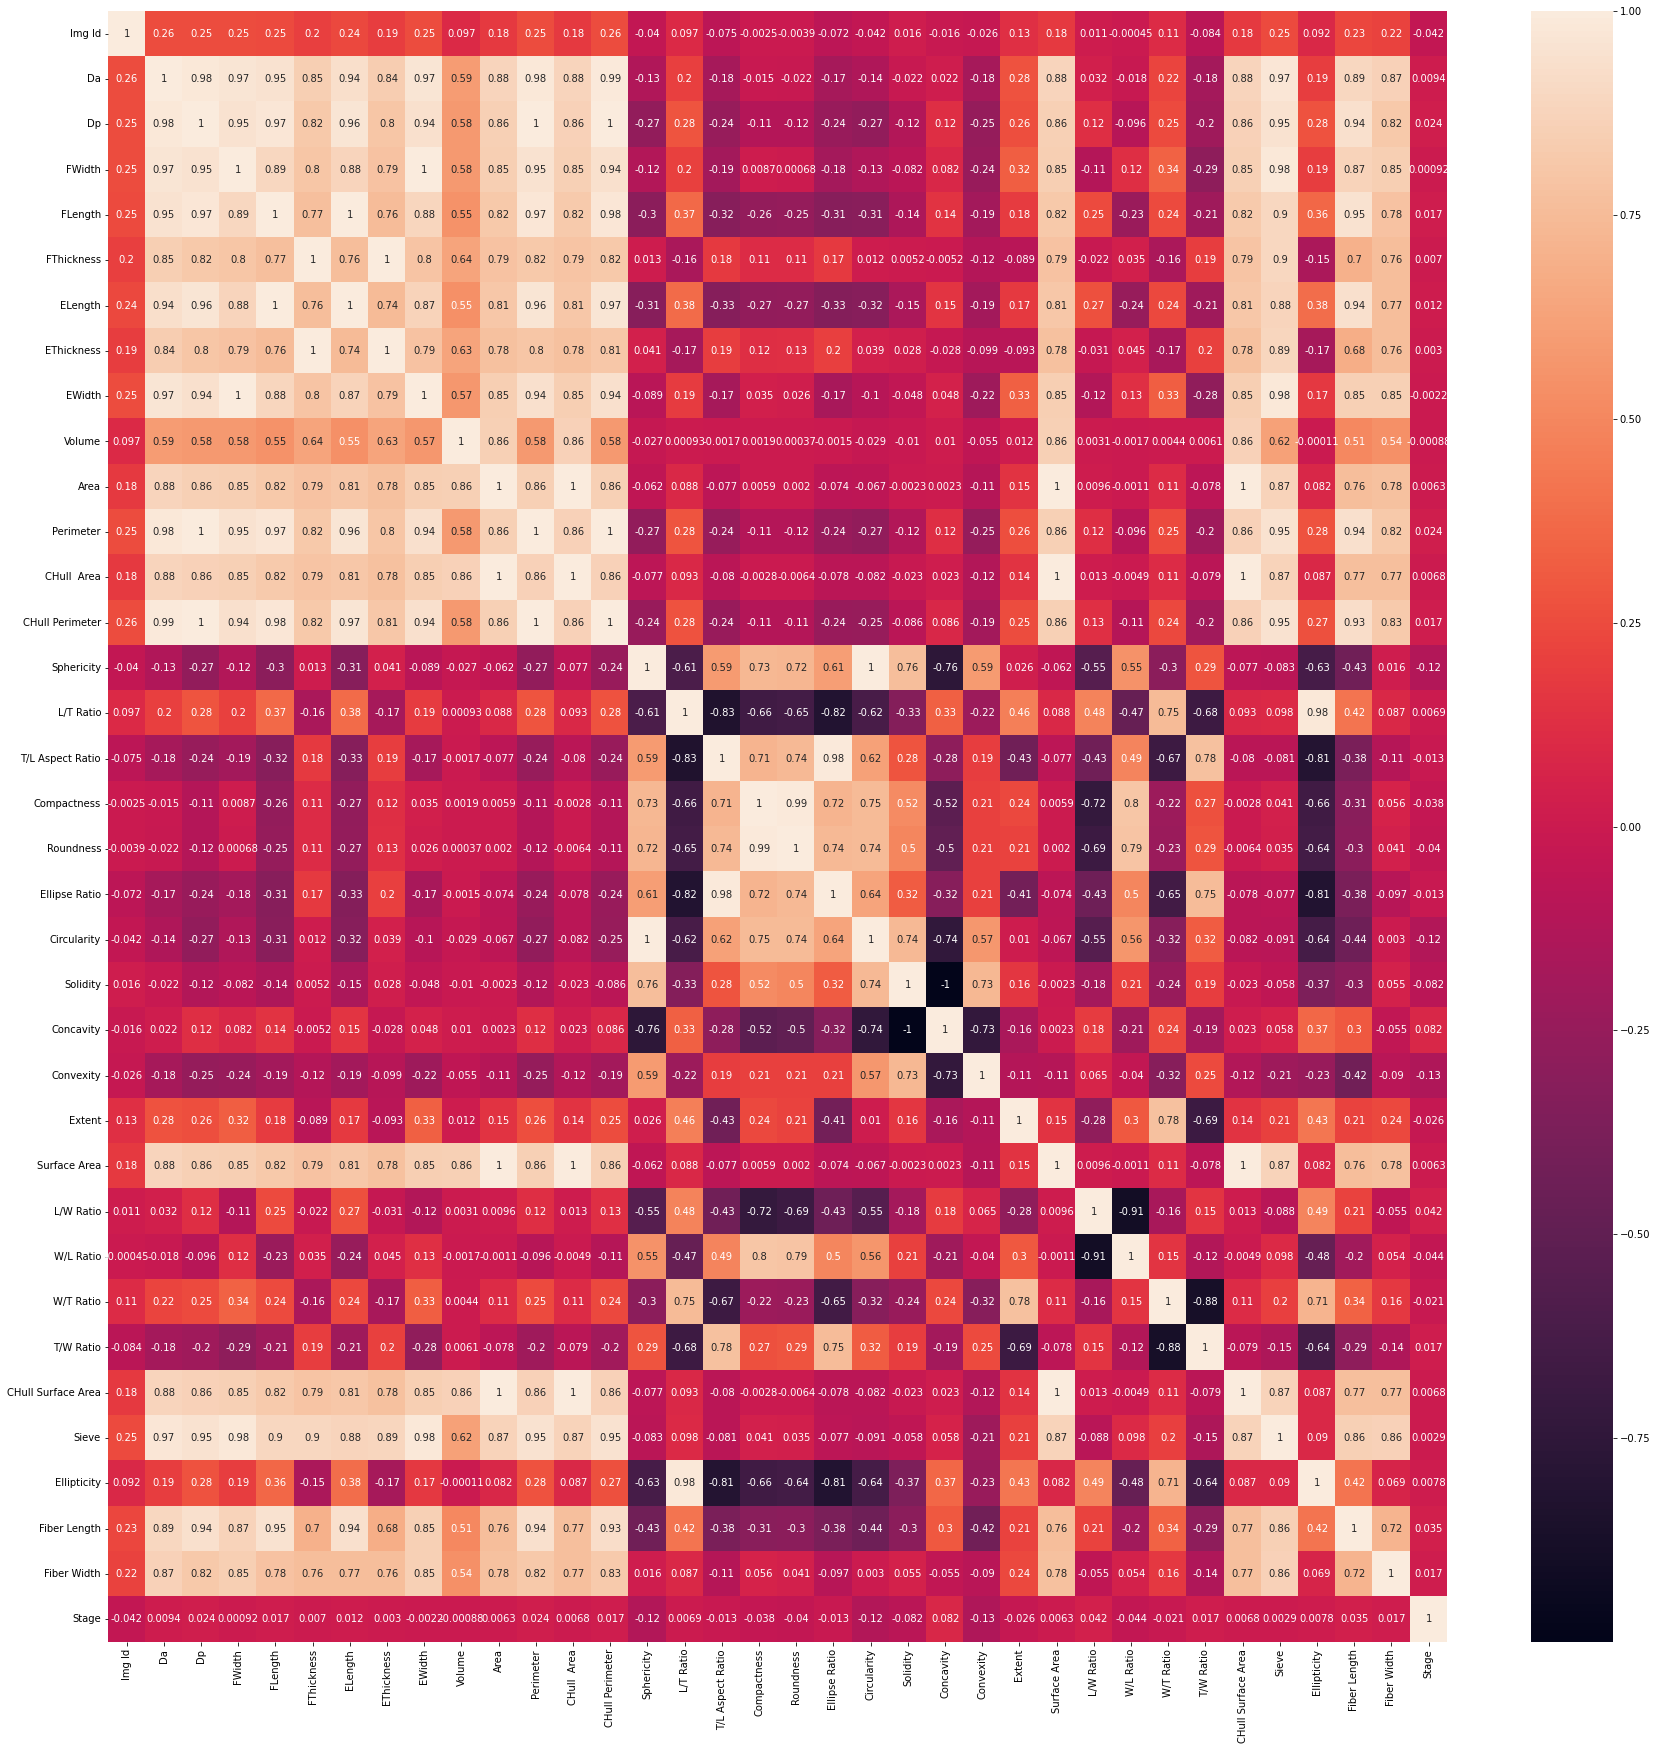

In [ ]:
# show heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (30,30))
sns.heatmap(tools_df.corr(), annot = True)

# Modeling
We are exploring multiple models used for multiclass classification and comparing performance metrics.
* Random Forest


## Random Forest Algorithm

In [3]:
# create a baseline random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

features = tools_df.loc[:, tools_df.columns != 'Stage']
feature_names = features.columns

target = tools_df['Stage']
target_name = 'Stage'

x_train, x_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.3,
    random_state = 10
)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [4]:
# make predictions and compare
y_pred = rf.predict(x_test)
print(y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

[1 1 1 ... 2 4 2]
Accuracy:  0.37434635496770224


### Tuning Random Forest w/ GridSearchCV
Here, I am creating a grid to find the best hyperparameters for this random forest model. There are 4320 possible combinations to search through.

In [8]:
# use RandomizedSearchCV to find best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid) 


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [9]:
# Random search training: fitting model
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 100,   # num combinations to search
    cv = 3,         # num of folds to use for cross val
    verbose = 2,
    random_state = 42,
    n_jobs = -1,
    refit = True)

search = rf.fit(x_train, y_train)

In [10]:
y_pred = rf.predict(x_test)
print(y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

[2 1 2 ... 2 1 1]
Accuracy:  0.3739977442838101


In [11]:
# get best parameters
search.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
# Random search training: fitting model
hyper_rf = RandomForestClassifier(
    bootstrap = True,
    ccp_alpha = 0.0,
    class_weight= None,
    criterion = 'gini',
    max_features = 'auto',
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_weight_fraction_leaf = 0.0,
    n_estimators = 100,
    oob_score = False,
    random_state = 10,
    verbose = 0,
    warm_start = False
)

hyper_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [13]:
hyper_pred = hyper_rf.predict(x_test)
print(hyper_pred)
accuracy = metrics.accuracy_score(y_test, hyper_pred)
print('Accuracy: ', accuracy) # accuracy got worse :-(

[2 1 1 ... 2 1 1]
Accuracy:  0.37328001640520864


In [ ]:
# display random forest
import pydotplus
import random

from IPython.display import Image  
from six import StringIO 

dot_data = StringIO()  

tree.export_graphviz(
    random.choice(rf.estimators_),
    out_file=dot_data,  
    feature_names=feature_names
)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())  
# each time i run the model, the trees change size

Below is some experimentation I did regarding decision trees and using gridsearchCV to hypertune.

## Tuning Decision Trees w/ GridSearchCV

1.   List item
2.   List item



In [ ]:
# using grid search and comparing accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics 
from sklearn.metrics import classification_report

# split data
x_train, x_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.3,
    random_state = 10
)

# train model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1, 20),
    "min_samples_split":range(1,50),
    "min_samples_leaf":range(1,20)
}

# finding best hyperparameters using gridsearchcv
grid = GridSearchCV(
    decision_tree, 
    param_grid = param_dict,
    cv = 10,
    verbose = 1,
    n_jobs = -1)

grid.fit(x_train, y_train)

#predictions = svc_model.predict(x_test)
#print(classification_report(y_test, predictions))

Fitting 10 folds for each of 35378 candidates, totalling 353780 fits


In [ ]:
print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
print("Best score:", grid.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 9}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=9)
Best score: 0.8006978189323506


In [ ]:
# tune decision tree based on svc_model 
from sklearn import tree

dt = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 11,
    min_samples_split = 9,
    min_samples_leaf = 9,
    random_state = 10
)

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

# show tree
import io
import pydotplus 
from IPython.display import Image

dot_data = io.StringIO()
tree.export_graphviz(
    dt,
    out_file = dot_data,
    feature_names = feature_names
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
print("Decision tree: ", Image(graph.create_png()))

### Decision Tree Tuning w/o GridSearchCV
Below are plots of hyperparameter values vs. model accuracy to see how to increase the accuracy of our decision tree and optimize the process. This was done because GridSearchCV took a while.

Parameters tuned:
* max_depth
* min_samples_split
* min_samples_leaf
* min_weight_fraction_leaf

In [ ]:
# determine best max_depth
depth_list = []
acc_list = []
for i in range(1,100):
  dt = tree.DecisionTreeClassifier(
    criterion = 'entropy', 
    max_depth = i,
    random_state = 10)
  dt.fit(x_train, y_train)
  y_pred = dt.predict(x_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  acc_list.append(acc)
  depth_list.append(i)

plt.plot(depth_list, acc_list)
plt.show()

print(max(acc_list))
for xy in zip(depth_list, acc_list):
   print(xy)

# max_depth = 11 at Accuracy: 0.8060494206910694 w/ entropy (before column removal)

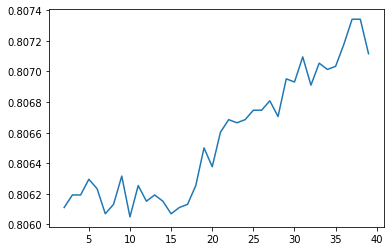

0.807341330872552
(2, 0.8061109402235209)
(3, 0.8061929662667897)
(4, 0.8061929662667897)
(5, 0.8062954988208756)
(6, 0.8062339792884241)
(7, 0.8060699272018866)
(8, 0.8061314467343381)
(9, 0.8063160053316928)
(10, 0.8060494206910694)
(11, 0.8062544857992413)
(12, 0.8061519532451553)
(13, 0.8061929662667897)
(14, 0.8061519532451553)
(15, 0.8060699272018866)
(16, 0.8061109402235209)
(17, 0.8061314467343381)
(18, 0.8062544857992413)
(19, 0.8065005639290475)
(20, 0.8063775248641444)
(21, 0.8066030964831334)
(22, 0.8066851225264021)
(23, 0.8066646160155849)
(24, 0.8066851225264021)
(25, 0.8067466420588537)
(26, 0.8067466420588537)
(27, 0.8068081615913052)
(28, 0.8067056290372193)
(29, 0.8069517071670256)
(30, 0.8069312006562084)
(31, 0.8070952527427459)
(32, 0.8069106941453912)
(33, 0.8070542397211115)
(34, 0.8070132266994771)
(35, 0.8070337332102943)
(36, 0.8071772787860145)
(37, 0.807341330872552)
(38, 0.807341330872552)
(39, 0.807115759253563)


In [ ]:
# determine best min_samples_split
split_list = []
acc_list2 = []
for i in range(2,40):
  dt = tree.DecisionTreeClassifier(
    criterion = 'entropy', 
    max_depth = 11,
    min_samples_split = i, 
    random_state = 10)
  dt.fit(x_train, y_train)
  y_pred = dt.predict(x_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  acc_list2.append(acc)
  split_list.append(i)

plt.plot(split_list, acc_list2)
plt.show()

print(max(acc_list2))
for xy in zip(split_list, acc_list2):
   print(xy)

# 37, 38 w/ accuracy = 0.807341330872552 (before column removal)

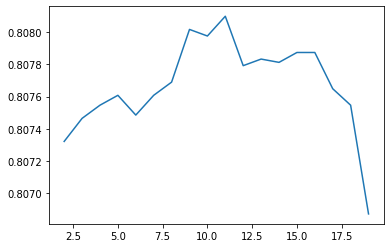

0.8081000717727879
(2, 0.8073208243617348)
(3, 0.8074643699374552)
(4, 0.8075463959807239)
(5, 0.8076079155131755)
(6, 0.8074848764482724)
(7, 0.8076079155131755)
(8, 0.8076899415564441)
(9, 0.8080180457295191)
(10, 0.8079770327078848)
(11, 0.8081000717727879)
(12, 0.8077924741105301)
(13, 0.8078334871321644)
(14, 0.8078129806213473)
(15, 0.8078745001537988)
(16, 0.8078745001537988)
(17, 0.8076489285348099)
(18, 0.8075463959807239)
(19, 0.8068696811237568)


In [ ]:
# determine best min_samples_leaf
from sklearn import metrics

leaf_list = []
acc_list_leaf = []
for i in range(2,20):
  dt = tree.DecisionTreeClassifier(
    criterion = 'entropy', 
    max_depth = 11,
    min_samples_split = 38,
    min_samples_leaf = i,
    random_state = 10)
  dt.fit(x_train, y_train)
  y_pred = dt.predict(x_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  acc_list_leaf.append(acc)
  leaf_list.append(i)

plt.plot(leaf_list, acc_list_leaf)
plt.show()

print(max(acc_list_leaf))
for xy in zip(leaf_list, acc_list_leaf):
   print(xy)

In [ ]:
# determine best min_weight_fraction_leaf
from sklearn import metrics

frac_list = []
acc_list_frac = []
for i in range(2,20):
  dt = tree.DecisionTreeClassifier(
    criterion = 'entropy', 
    max_depth = 11,
    min_samples_split = 38,
    min_samples_leaf = 11,
    min_weight_fraction_leaf = i,
    random_state = 10)
  dt.fit(x_train, y_train)
  y_pred = dt.predict(x_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  acc_list_frac.append(acc)
  frac_list.append(i)

plt.plot(frac_list, acc_list_frac)
plt.show()

print(max(acc_list_frac))
for xy in zip(frac_list, acc_list_frac):
   print(xy)

## Visualizing Tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.031827 to fit



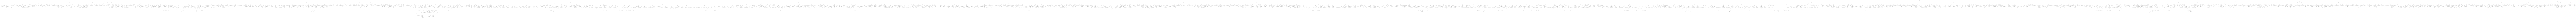

In [ ]:
# visualize tree
import io
import pydotplus
from IPython.display import Image  

dot_data = io.StringIO()  

tree.export_graphviz(
    dt,
    out_file=dot_data,  
    feature_names=feature_names
)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())  